### Qinhua Sun

# *Homework 1 (con't)*
# Problem 4: Naive Bayes Classifiers 

## Question 4

Number of parameters in naive Bayes classifier:
5 parameters 

Number of "joint" classifier:
$$ 2^5 -1 = 31 $$

If we want to use joint classifier to represent the distribution p(x1,x2,x3,x4,x5 | y = 1), we will need to create a truth table and list all the 31 combinations of five features, and then specify each of the cases given our data. However, we do not have enough data points to match all the instances, and thus some instances will be marked as 0 incorrectly, overfitting the model. If we use naive baye classfier, we will only need p(x1|y=1), p(x2|y=1) ,... to calculate p(x1,x2,x3,x4,x5 | y = 1).  

## Question 5

We do not need to retrain the model, as for Naive Bayes we assume all the features to be independent of each other. The new model now looks like:

$$ p(y =1|x_2,x_3,x_4,x_5) = \frac{p(x_2|y =1)p(x_3|y)p(x_4|y=1)p(x_5|y=1)\times p(y=1)}
{p(x_2|y =1)p(x_3|y)p(x_4|y=1)p(x_5|y=1) + p(x_2|y =1)p(x_3|y)p(x_4|y=1)p(x_5|y=-1)} $$


# *Homework 2*
# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
np.random.seed(0)

data = np.genfromtxt("data/curve80.txt",delimiter=None)
print(data.shape)

X = data[:,0]
X = np.atleast_2d(X).T  # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25


print('X train', Xtr.shape)
print('X test', Xte.shape)
print('Y train', Ytr.shape)
print('Y test', Yte.shape)



(80, 2)
X train (60, 1)
X test (20, 1)
Y train (60,)
Y test (20,)


# Problem 2

In [189]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix 
ys = lr.predict( xs ) # make predictions at xs

## a) 

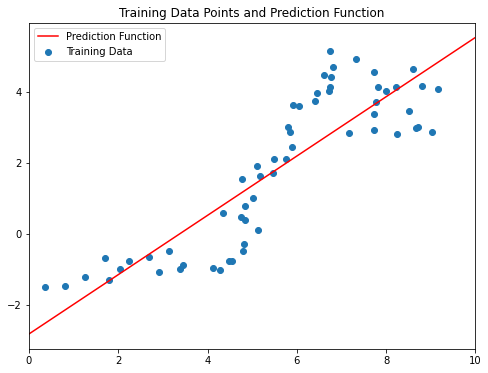

In [190]:

fig, ax = plt.subplots(1,1, figsize=(8,6))



ax.scatter(Xtr, Ytr, label = "Training Data") 
ax.plot(xs, ys,'r', label = "Prediction Function")
ax.set_xlim(0, 10)
ax.set_title("Training Data Points and Prediction Function")
ax.legend()

plt.show()

## b)

In [191]:
print(lr.theta)

[[-2.82765049  0.83606916]]


The intercept is the same as theta[0] and theta[1] seems to match 

## c)

In [194]:
def MSE(X, Y):
    Yhat = lr.predict(X)
    Ys = np.atleast_2d(Y).T
    e = Ys - Yhat
    j = e.T@(e)/X.shape[0]

    return j

print('mean squared error of training data is', MSE(Xtr, Ytr))
print('mean squared error of test data is', MSE(Xte, Yte))



mean squared error of training data is [[1.12771196]]
mean squared error of test data is [[2.2423492]]


## Problem 3


## a)

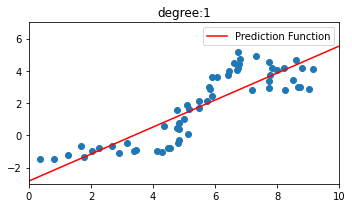

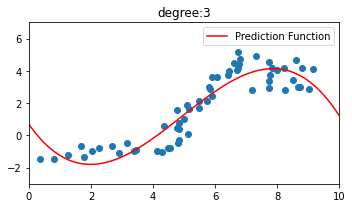

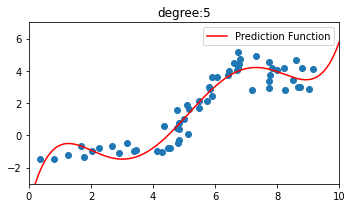

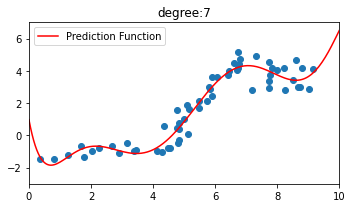

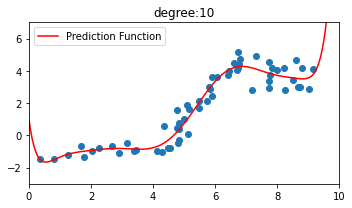

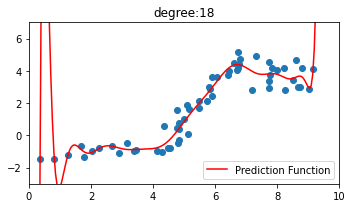

In [275]:
Xtr2 = np.zeros((Xtr.shape[0],2)) # create Mx2 array to store features
Xtr2[:,0] = Xtr[:,0] # place original "x" feature as X1
Xtr2[:,1] = Xtr[:,0]**2 # place "x^2" feature as X2






# for degree in degrees:
    
#     def Phi(X):
#         return ml.transforms.rescale( ml.transforms.fpoly(X, degree, False), params)[0]
    
#     # get the params and XtrP
#     XtrP = ml.transforms.fpoly(Xtr, degree, False)
#     XtrP, params = ml.transforms.rescale( XtrP )
#     # learning
#     lr = ml.linear.linearRegress( XtrP, Ytr )
#     # plot
#     plt.scatter(Xtr, Ytr, c = 'r')
#     plt.plot(xs, lr.predict(Phi(xs)), c = 'g')
#     plt.title("degree is  " + str(degree))
#     plt.xlim(-0.2, 10.2)
#     plt.ylim(-3, 8)
#     plt.show()

degrees = [1,3,5,7,10,18]
train_err = []
test_err = []
def Phi(X):
    return ml.transforms.rescale( ml.transforms.fpoly(X, degree, False), params)[0]

for degree in degrees:
    # create polynomial features up to "degree"
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)

    # rescale the data matrix so that the features have similar ranges /variance
    XtrP,params = ml.transforms.rescale(XtrP)

    # train the model
    lr = ml.linear.linearRegress(XtrP, Ytr)

    fig, ax = plt.subplots(1,1,tight_layout=True, figsize=(5,3))
    ax.scatter(Xtr, Ytr)
    plt.xlim(-0, 10)
    plt.ylim(-3, 7)

    YhatTrain = lr.predict(Phi(Xtr))
    YhatTest = lr.predict(Phi(Xte))
    
    ax.plot(xs,lr.predict(Phi(xs)),'r', label = "Prediction Function")
    ax.legend()
    ax.set_title('degree:%d'% degree)
#     print(XtrP.shape)
#     print(Ytr.shape)
    
    train_err.append(MSE(XtrP, Ytr))
    test_err.append(MSE(Phi(Xte), Yte))

## b)

Text(0.5, 0, 'degree')

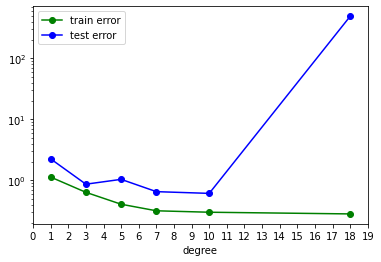

In [273]:
plt.semilogy(degrees, np.squeeze(train_err), 'g-o', label='train error')
plt.semilogy(degrees, np.squeeze(test_err), 'b-o', label ='test error')
plt.legend()
plt.xticks(np.arange(0,20))
plt.xlabel('degree')


## c)

Degree of 10, because at 10 train error and test error were both minimized.

# Statement of Collaboration

This is the Statement of Collaboration,meaning that I have followed the academic honesty guidelines and did not discussed this assignment with anyone.

Qinhua Sun